<a href="https://colab.research.google.com/github/rish4/Colonoscopy-Feb22/blob/main/CNew_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import keras
import tensorflow as tf
from keras import backend as K
from keras import metrics
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer, Activation, SeparableConv2D, Conv2DTranspose
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import AUC
#from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
from keras.preprocessing import image
from IPython.display import display
from PIL import Image

In [2]:
## Set file paths to image files

train_path = "/content/drive/MyDrive/Colonoscopy Research'22/Dataset/NewDB/Training set"
test_path = "/content/drive/MyDrive/Colonoscopy Research'22/Dataset/NewDB/Test set"

## Set up hyperparameters that will be used later
hyper_dimension = 128
hyper_batch_size = 32
#hyper_epochs = 100
hyper_channels = 3
hyper_mode = 'rgb'

## Generate batches of image data (train, validation, and test) with data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255.0, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True )

#val_datagen = ImageDataGenerator(rescale=1.0/255.0) 
test_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                  shear_range = 0.2,
                                  zoom_range = 0.2, 
                                  horizontal_flip = True) 

train_generator = train_datagen.flow_from_directory(directory = train_path, 
                                                    target_size = (hyper_dimension, hyper_dimension),
                                                    batch_size = hyper_batch_size, 
                                                    color_mode = hyper_mode,
                                                    class_mode = 'binary', 
                                                    seed = 42)

test_generator = test_datagen.flow_from_directory(directory = test_path, 
                                                 target_size = (hyper_dimension, hyper_dimension),
                                                 batch_size = hyper_batch_size, 
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode,
                                                 shuffle=False,
                                                 seed = 42)

test_generator.reset()

Found 1656 images belonging to 2 classes.
Found 415 images belonging to 2 classes.


In [3]:
cnn = Sequential()
cnn.add(InputLayer(input_shape=(hyper_dimension, hyper_dimension, hyper_channels)))

cnn.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2DTranspose(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(SeparableConv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

cnn.add(Dense(activation='relu', units=128))
cnn.add(Dense(activation='sigmoid', units=1))

cnn.summary()

cnn.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model = cnn.fit_generator(train_generator, 
                              steps_per_epoch = len(train_generator), 
                              epochs = 50, 
                              validation_data = test_generator,
                              validation_steps = len(test_generator)
                              )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_transpose (Conv2DTra  (None, 65, 65, 32)       4640      
 nspose)                                                         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 separable_conv2d (Separable  (None, 30, 30, 64)       2400      
 Conv2D)                                                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
52/52 [==============================] - 1130s 22s/step - loss: 0.6007 - accuracy: 0.6733 - val_loss: 0.5031 - val_accuracy: 0.7518
Epoch 2/50
52/52 [==============================] - 65s 1s/step - loss: 0.4608 - accuracy: 0.7808 - val_loss: 0.3443 - val_accuracy: 0.8771
Epoch 3/50
52/52 [==============================] - 64s 1s/step - loss: 0.3836 - accuracy: 0.8315 - val_loss: 0.3107 - val_accuracy: 0.8916
Epoch 4/50
52/52 [==============================] - 64s 1s/step - loss: 0.3546 - accuracy: 0.8412 - val_loss: 0.3116 - val_accuracy: 0.8843
Epoch 5/50
52/52 [==============================] - 64s 1s/step - loss: 0.3519 - accuracy: 0.8496 - val_loss: 0.4146 - val_accuracy: 0.7976
Epoch 6/50
52/52 [==============================] - 75s 1s/step - loss: 0.3247 - accuracy: 0.8599 - val_loss: 0.2803 - val_accuracy: 0.8916
Epoch 7/50
52/52 [==============================] - 64s 1s/step - loss: 0.3041 - accuracy: 0.8659 - val_loss: 0.2626 - val_accuracy: 0.9084
Epoch 8/50
52/52 

In [4]:
def create_charts(cnn, cnn_model):
    ## DEFINE ##
    ## Define 1:  train & validation loss
    train_loss = cnn_model.history['loss']
    val_loss = cnn_model.history['val_loss']
    
    ## Define 2: train & validation AUC
    train_auc_name = list(cnn_model.history.keys())[3]
    val_auc_name = list(cnn_model.history.keys())[1]
    train_auc = cnn_model.history[train_auc_name]
    val_auc = cnn_model.history[val_auc_name]
    
    ## Define 3: y_pred & y_true
    y_true = test_generator.classes
    #print(y_true)
    Y_pred = cnn.predict_generator(test_generator, steps = len(test_generator))
    y_pred = (Y_pred > 0.5).T[0]
    #print(y_pred)
    y_pred_prob = Y_pred.T[0]
    #print(y_pred_prob)
    
    ## PLOT ##
    fig = plt.figure(figsize=(13, 10))
    
    ## PLOT 1: TRAIN VS. VALIDATION LOSS 
    plt.subplot(2,2,1)
    plt.title("Training vs. Validation Loss")
    plt.plot(train_loss, label='training loss')
    plt.plot(val_loss, label='validation loss')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()
    plt.savefig("/content/drive/MyDrive/Colonoscopy Research'22/Images/CNew-5/loss.png", dpi=600)

    ## PLOT 2: TRAIN VS. VALIDATION AUC
    plt.subplot(2,2,2)
    plt.title("Training vs. Validation AUC Score")
    plt.plot(train_auc, label='training auc')
    plt.plot(val_auc, label='validation auc')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()
    plt.savefig("/content/drive/MyDrive/Colonoscopy Research'22/Images/CNew-5/auc.png", dpi=600)
    
    ## PLOT 3: CONFUSION MATRIX
    plt.subplot(2,2,3)
      # Set up the labels for in the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ticklabels = ['Normal', 'Abnormal']

      # Create confusion matrix as heatmap
    sns.set(font_scale = 1.4)
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
    plt.xlabel("Predicted", size=14)
    plt.ylabel("Actual", size=14) 
    plt.savefig("/content/drive/MyDrive/Colonoscopy Research'22/Images/CNew-5/cm.png", transparent=True,dpi=600) 
    
    ## PLOT 4: ROC CURVE
    plt.subplot(2,2,4)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label = "Random (AUC = 50%)")
    plt.plot(fpr, tpr, label='CNN (AUC = {:.2f}%)'.format(auc*100))
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.legend(loc='best')
    plt.savefig("/content/drive/MyDrive/Colonoscopy Research'22/Images/CNew-5/roc.png", bbox_inches='tight', pad_inches=1,dpi=600)
    
    ## END PLOTS
    plt.tight_layout()
    ;
    
    ## Summary Statistics
    TN, FP, FN, TP = cm.ravel() # cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
    accuracy = (TP + TN) / np.sum(cm) # % positive out of all predicted positives
    precision = TP / (TP+FP) # % positive out of all predicted positives
    recall =  TP / (TP+FN) # % positive out of all supposed to be positives
    specificity = TN / (TN+FP) # % negative out of all supposed to be negatives
    f1 = 2*precision*recall / (precision + recall)
    stats_summary = '[Summary Statistics]\nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(accuracy, precision, recall, specificity, f1)
    print(stats_summary)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  app.launch_new_instance()


[Summary Statistics]
Accuracy = 91.81% | Precision = 93.72% | Recall = 90.23% | Specificity = 93.50% | F1 Score = 91.94%


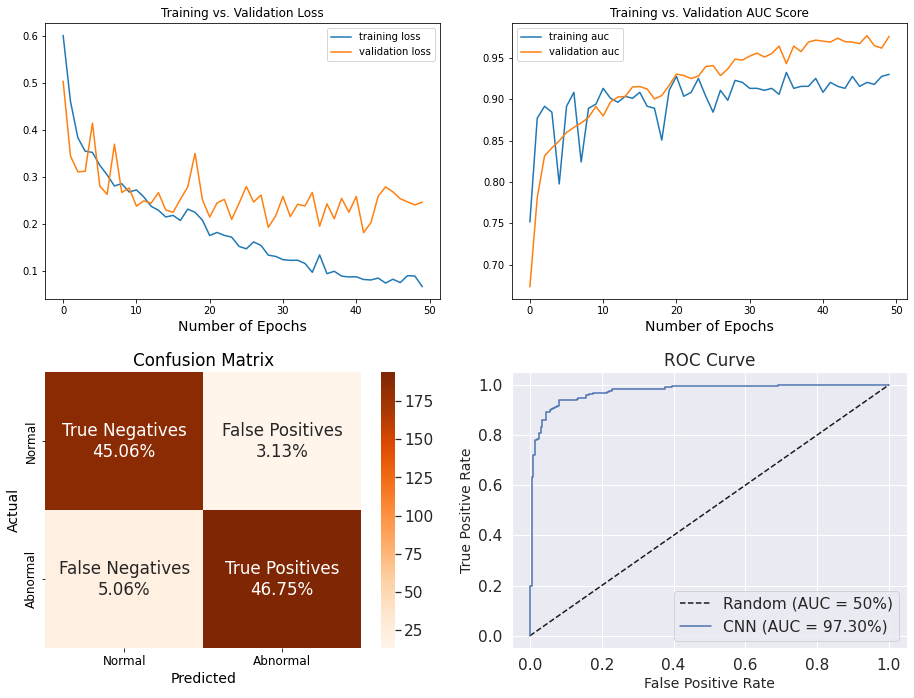

In [5]:
create_charts(cnn, cnn_model)

In [6]:
import numpy as np
from keras.preprocessing import image
import cv2
import os
import glob
img_dir=["/content/drive/MyDrive/Colonoscopy Research'22/Dataset/NewDB/Test set/Non polyp/NonP1Test",
         "/content/drive/MyDrive/Colonoscopy Research'22/Dataset/NewDB/Test set/Non polyp/NonP2Test",
         "/content/drive/MyDrive/Colonoscopy Research'22/Dataset/NewDB/Test set/Non polyp/NonP3Test",
         "/content/drive/MyDrive/Colonoscopy Research'22/Dataset/NewDB/Test set/Polyp/Polyp1Test",
         "/content/drive/MyDrive/Colonoscopy Research'22/Dataset/NewDB/Test set/Polyp/Polyp2Test",
         "/content/drive/MyDrive/Colonoscopy Research'22/Dataset/NewDB/Test set/Polyp/Polyp3Test"]

a=0
n=0         
#img_dir =  # Enter Directory of all images 
for img in img_dir:
  data_path = os.path.join(img,'*g')
  files = glob.glob(data_path)
  data = []
  
  for f1 in files:
      #img = cv2.imread(f1)
      #data.append(img)
      test_image= image.load_img(f1, target_size=(128,128))
      test_image=image.img_to_array(test_image)
      test_image= np.expand_dims(test_image, axis=0)
      result=cnn.predict(test_image)
      #print(result)
      prediction=[]
      if result[0][0] == 1:
          prediction='Abnormal'
      else:
          prediction='Normal'
      if prediction == 'Abnormal':
          a=a+1
      else:
          n=n+1
print("No. of total images =", a+n)

print("No. of polyp images in the test set = 215 ")

print("No. of polyp images predicted =", a)
#print(a)

print("No. of non polyp images in the test set = 200")

print("No. of non polyp images predicted =", n)
#print(n)

No. of total images = 415
No. of polyp images in the test set = 215 
No. of polyp images predicted = 241
No. of non polyp images in the test set = 200
No. of non polyp images predicted = 174


In [12]:
import numpy as np
from keras.preprocessing import image
import cv2
import os
import glob
img_dir=["/content/drive/MyDrive/Colonoscopy Research'22/Dataset/CVC-Clinic test"]

a=0
n=0         
#img_dir =  # Enter Directory of all images 
for img in img_dir:
  data_path = os.path.join(img,'*g')
  files = glob.glob(data_path)
  data = []
  
  for f1 in files:
      #img = cv2.imread(f1)
      #data.append(img)
      test_image= image.load_img(f1, target_size=(128,128))
      test_image=image.img_to_array(test_image)
      test_image= np.expand_dims(test_image, axis=0)
      result=cnn.predict(test_image)
      #print(result)
      prediction=[]
      if result[0][0] == 1:
          prediction='Abnormal'
      else:
          prediction='Normal'
      if prediction == 'Abnormal':
          a=a+1
      else:
          n=n+1
print("No. of total images =", a+n)

print("No. of polyp images in the test set = 177 ")

print("No. of polyp images predicted =", a)
#print(a)

print("No. of non polyp images in the test set = 0")

print("No. of non polyp images predicted =", n)
#print(n)

No. of total images = 177
No. of polyp images in the test set = 177 
No. of polyp images predicted = 172
No. of non polyp images in the test set = 0
No. of non polyp images predicted = 5


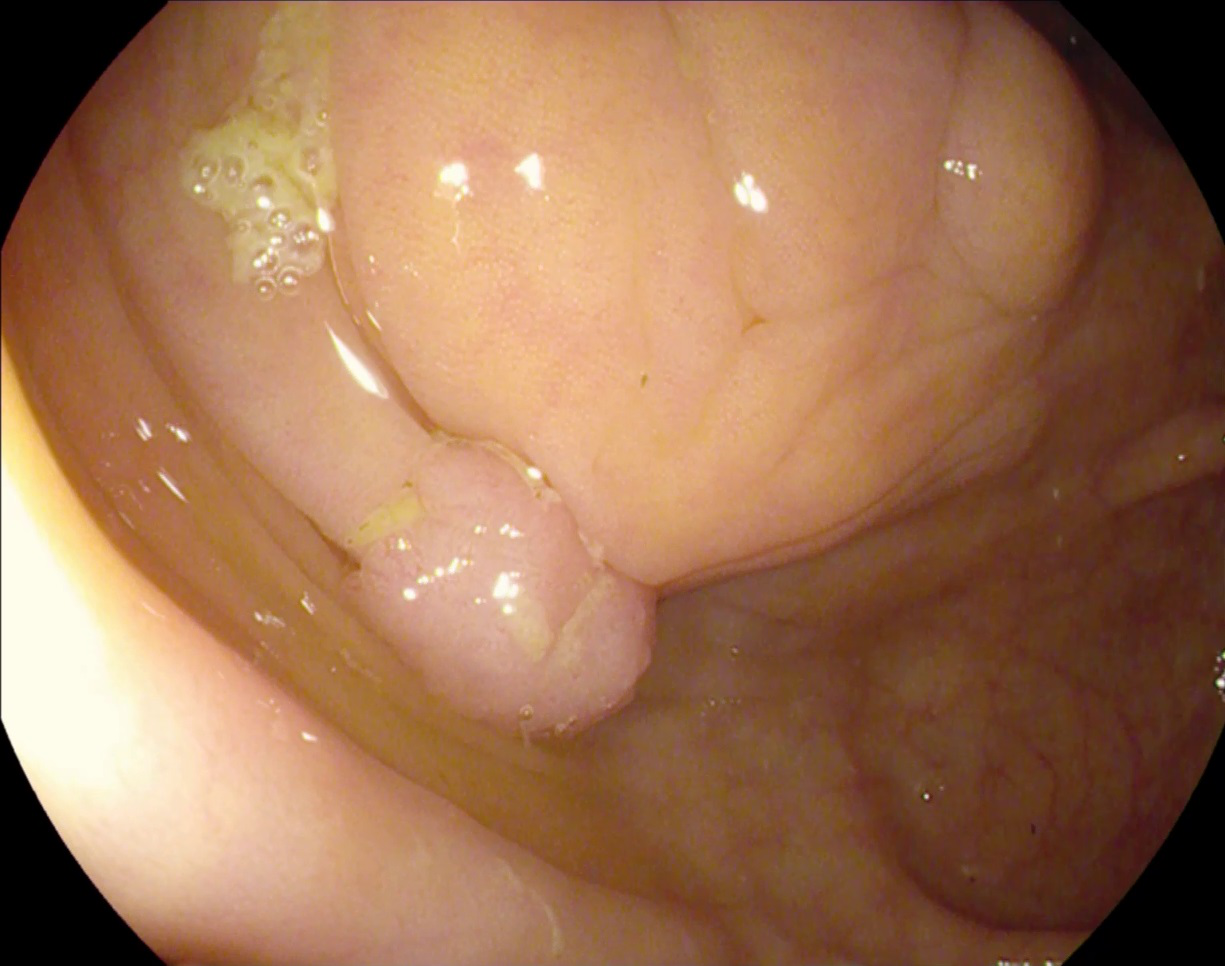

(1, 63, 63, 16)
(1, 65, 65, 32)
(1, 32, 32, 32)
(1, 30, 30, 64)
(1, 15, 15, 64)
(1, 14400)
(1, 128)
(1, 1)


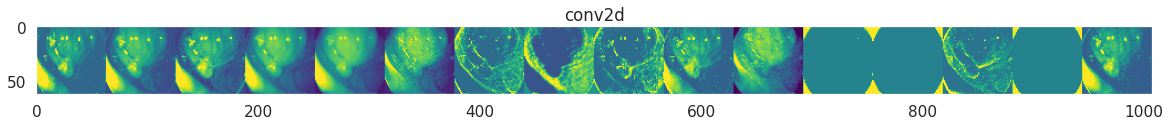

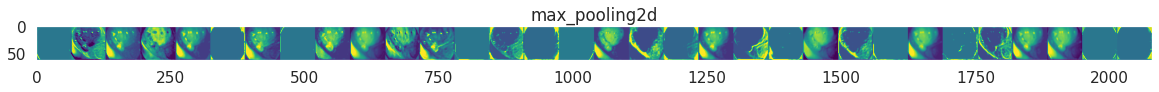

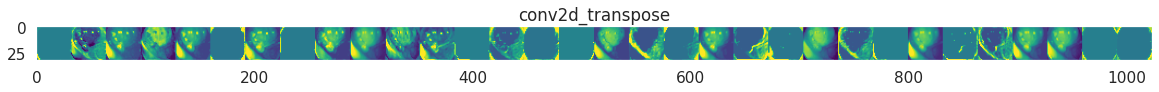

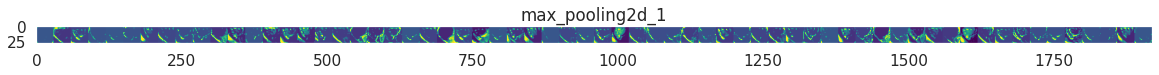

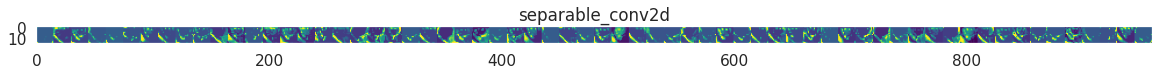

In [8]:
img_path="/content/drive/MyDrive/Colonoscopy Research'22/Dataset/NewDB/Test set/Polyp/Polyp2Test/162.jpg" #unhealthy
display(Image.open("/content/drive/MyDrive/Colonoscopy Research'22/Dataset/NewDB/Test set/Polyp/Polyp2Test/162.jpg"))
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in cnn.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = models.Model(inputs = cnn.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(128, 128))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in cnn.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis',dpi=600 )

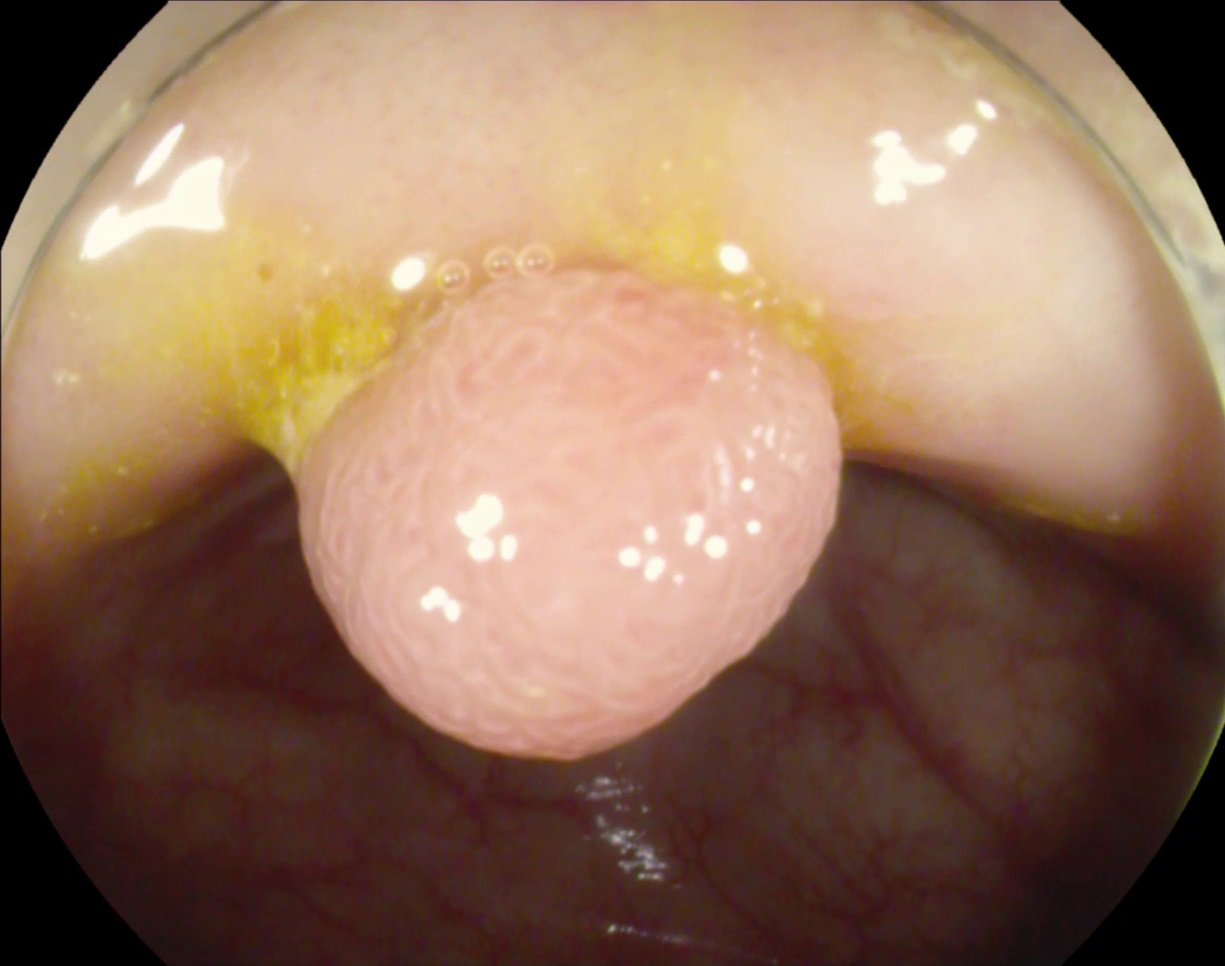

(1, 63, 63, 16)
(1, 65, 65, 32)
(1, 32, 32, 32)
(1, 30, 30, 64)
(1, 15, 15, 64)
(1, 14400)
(1, 128)
(1, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


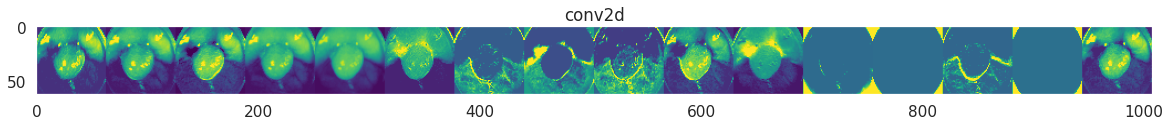

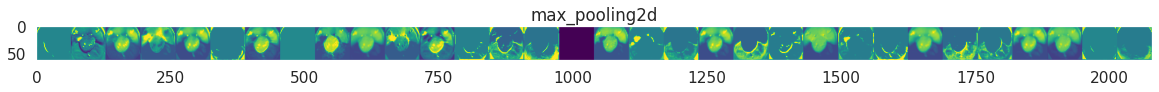

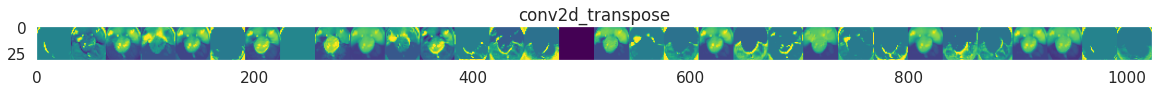

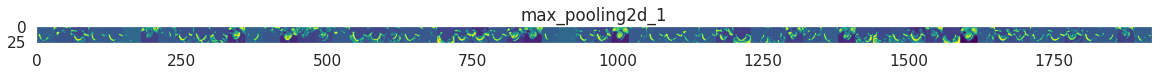

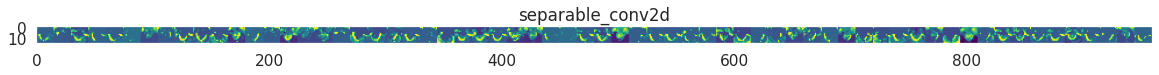

In [9]:
img_path="/content/drive/MyDrive/Colonoscopy Research'22/Dataset/NewDB/Training set/Polyp/Polyp2Train/66.jpg" #unhealthy
display(Image.open("/content/drive/MyDrive/Colonoscopy Research'22/Dataset/NewDB/Training set/Polyp/Polyp2Train/66.jpg"))

# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in cnn.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = models.Model(inputs = cnn.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(128, 128))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in cnn.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [10]:
pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-_eeuvdl2
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-_eeuvdl2
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101077 sha256=ce8249ec5c2a157bd8e2e9c7ea881913bc9bf20f896b57612215329446428a31
  Stored in directory: /tmp/pip-ephem-wheel-cache-z_3qqxc3/wheels/bb/1f/f2/b57495012683b6b20bbae94a3915ec79753111452d79886abc
Successfully built keras-contrib


In [11]:
from keras import activations
from keract import get_activations, display_heatmaps, display_activations
# The image path
img_path = "/content/drive/MyDrive/Colonoscopy Research'22/Dataset/NewDB/Training set/Polyp/Polyp2Train/66.jpg"
# Preprocessing the image for the model
x = preprocess_image(img_path=img_path,model=model,resize=target_size)
# Generate the activations 
activations = get_activations(model, x)
display_activations(activations, save=False)

ModuleNotFoundError: ignored

In [ ]:
img_path="/content/drive/MyDrive/Colonoscopy Research'22/Dataset/NewDB/Training set/Polyp/Polyp2Train/66.jpg"

In [ ]:
 def visualize_class_activation_map(model, img_path, output_path):
        model = cnn_model
        original_img = cv2.imread(img_path, 1)
        width, height, _ = original_img.shape

        #Reshape to the network input shape (3, w, h).
        img = np.array([np.transpose(np.float32(original_img), (2, 0, 1))])
        
        #Get the 512 input weights to the softmax.
        class_weights = model.layers[-1].get_weights()[0]
        #final_conv_layer = get_output_layer(model, "conv5_3")
        get_output = K.function([model.layers[0].input], \
                    [final_conv_layer.output, 
        model.layers[-1].output])
        [conv_outputs, predictions] = get_output([img])
        conv_outputs = conv_outputs[0, :, :, :]

        #Create the class activation map.
        cam = np.zeros(dtype = np.float32, shape = conv_outputs.shape[1:3])
        target_class = 1
        for i, w in enumerate(class_weights[:, target_class]):
                cam += w * conv_outputs[i, :, :]

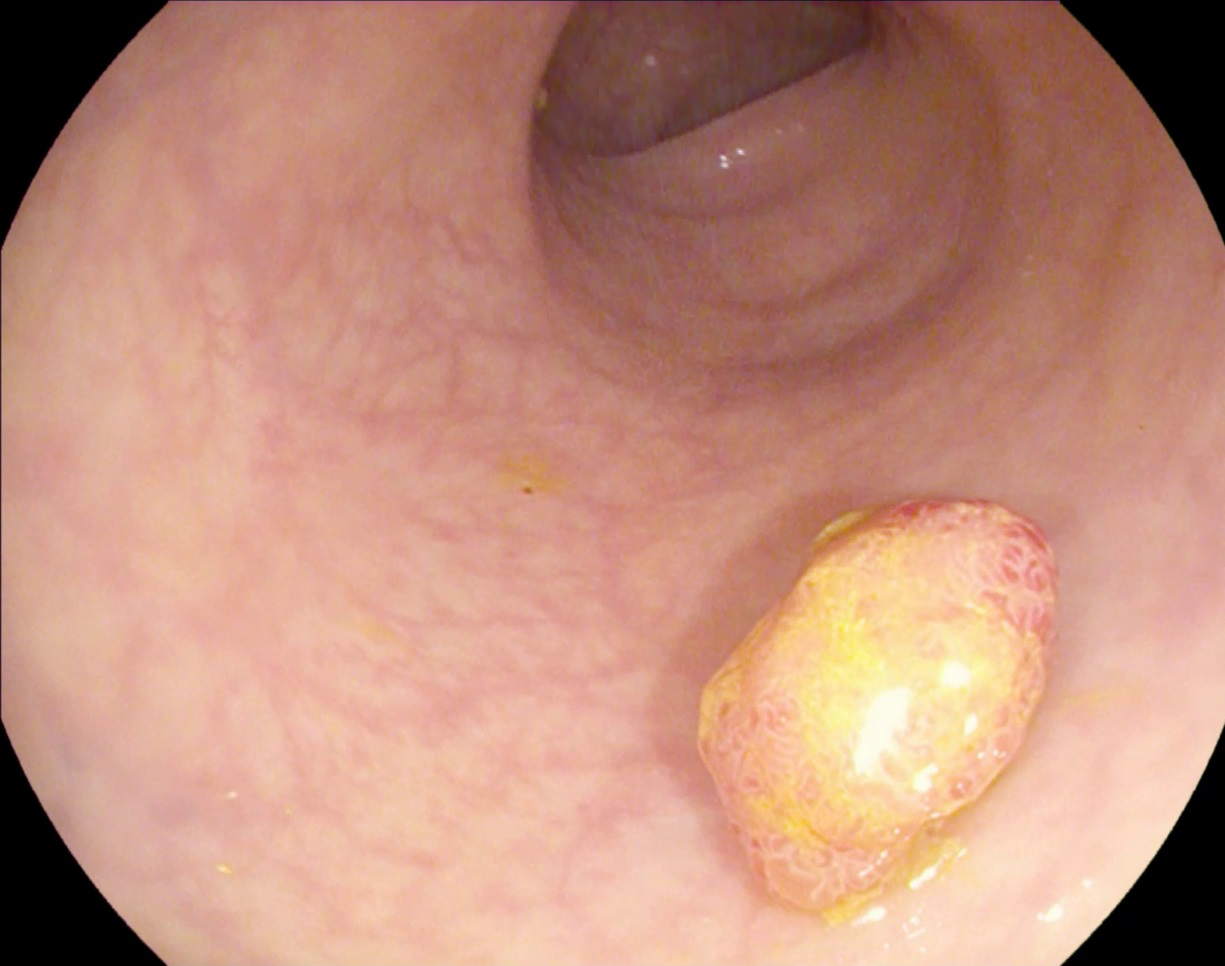

(1, 63, 63, 16)
(1, 65, 65, 32)
(1, 32, 32, 32)
(1, 30, 30, 64)
(1, 15, 15, 64)
(1, 14400)
(1, 128)
(1, 1)


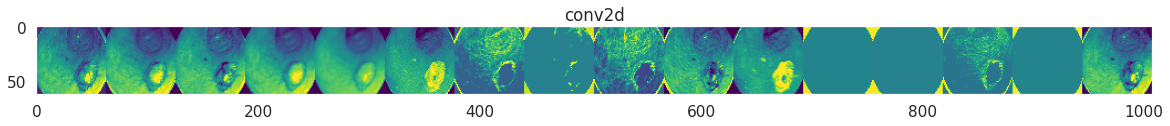

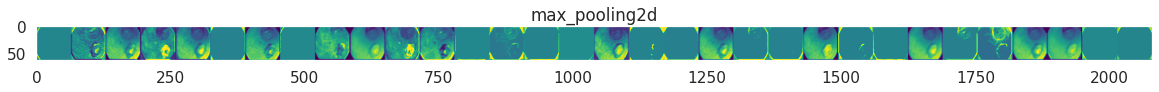

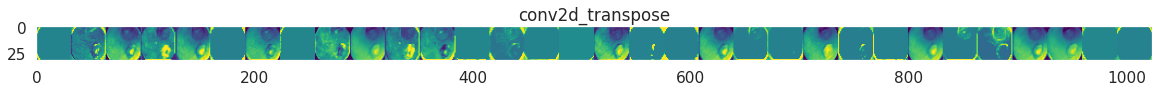

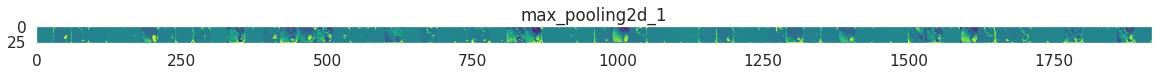

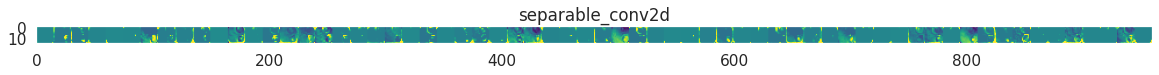

In [13]:
img_path="/content/drive/MyDrive/Colonoscopy Research'22/Dataset/NewDB/Training set/Polyp/Polyp2Train/81.jpg" #unhealthy
display(Image.open("/content/drive/MyDrive/Colonoscopy Research'22/Dataset/NewDB/Training set/Polyp/Polyp2Train/81.jpg"))

# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in cnn.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = models.Model(inputs = cnn.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(128, 128))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in cnn.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )